In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

from matplotlib.patches import Arc, Rectangle
from matplotlib.lines import Line2D

import numpy as np

In [48]:
def ls_circle(points):
    '''
    Input: Nx2 points
    Output: cx, cy, r
    '''
    xs = points[:,0]
    ys = points[:,1]

    us = xs - np.mean(xs)
    vs = ys - np.mean(ys)

    Suu = np.sum(us**2)
    Suv = np.sum(us*vs)
    Svv = np.sum(vs**2)
    Suuu = np.sum(us**3)
    Suvv = np.sum(us*vs*vs)
    Svvv = np.sum(vs**3)
    Svuu = np.sum(vs*us*us)

    A = np.array([
        [Suu, Suv],
        [Suv, Svv]
    ])

    b = np.array([1/2.*Suuu+1/2.*Suvv, 1/2.*Svvv+1/2.*Svuu])

    cx, cy = np.linalg.solve(A, b)
    r = np.sqrt(cx*cx+cy*cy+(Suu+Svv)/len(xs))

    cx += np.mean(xs)
    cy += np.mean(ys)

    return np.array([cx, cy]), r


def project_point_to_circle(point, c, r):
    direction = point - c
    closest = c + (direction / np.linalg.norm(direction)) * r

    return closest


def make_arc(c, r, start=0, end=2*np.pi):
    theta = np.linspace(start, end, 100)
    print(start, end)
    x1 = r * np.cos(theta) + c[0]
    x2 = r * np.sin(theta) + c[1]

    return np.stack([x1, x2], 1)


def get_angle_plot(line1, line2, offset=1, color='k', origin=[0,0]):
    l1xy = line1.get_xydata()
    l2xy = line2.get_xydata()

    u = l1xy[1] - l1xy[0]
    v = l2xy[1] - l2xy[0]

    angle1 = abs(np.degrees(np.arctan2(u[1], u[0])))
    angle2 = abs(np.degrees(np.arctan2(v[1], v[0])))

    theta1 = min(angle1, angle2)
    theta2 = max(angle1, angle2)

    return Arc(
            origin, offset, offset,
            0, theta1, theta2, color=color, linewidth=1.0, zorder=1.0)


def arrow(ax, p1, p2, text='', color='k', head_width=0.02):
    line = Line2D([p1[0], p2[0]], [p1[1], p2[1]], color=color)

    ax.add_line(line)
    ax.arrow(
            p2[0], p2[1],
            (p2[0] - p1[0]) * 0.001, (p2[1] - p1[1]) * 0.001,
            head_width=head_width, color=color)

    if text:
        ax.text(p2[0], p2[1], text)

In [49]:
colors = {'butter1': (252, 233,  79),
        'butter2': (237, 212,   0),
        'butter3': (196, 160,   0),
        'orange1': (252, 175,  62),
        'orange2': (245, 121,   0),
        'orange3': (206,  92,   0),
        'chocolate1': (233, 185, 110),
        'chocolate2': (193, 125,  17),
        'chocolate3': (143,  89,   2),
        'chameleon1': (138, 226,  52),
        'chameleon2': (115, 210,  22),
        'chameleon3': ( 78, 154,   6),
        'skyblue1': (114, 159, 207),
        'skyblue2': ( 52, 101, 164),
        'skyblue3': ( 32,  74, 135),
        'plum1': (173, 127, 168),
        'plum2': (117,  80, 123),
        'plum3': ( 92,  53, 102),
        'scarletred1': (239,  41,  41),
        'scarletred2': (204,   0,   0),
        'scarletred3': (164,   0,   0),
        'aluminium1': (238, 238, 236),
        'aluminium2': (211, 215, 207),
        'aluminium3': (186, 189, 182),
        'aluminium4': (136, 138, 133),
        'aluminium5': ( 85,  87,  83),
        'aluminium6': ( 46,  52,  54),
        'indigo': (114,  33, 188),
        'maroon': (103,   7,  72),
        'turquoise': ( 64, 224, 208),
        'green4': ( 0, 139, 0)}


for k, (r, g, b) in colors.items():
    colors[k] = (r / 255, g / 255, b / 255)


6.283185307179586 8.230972752405258


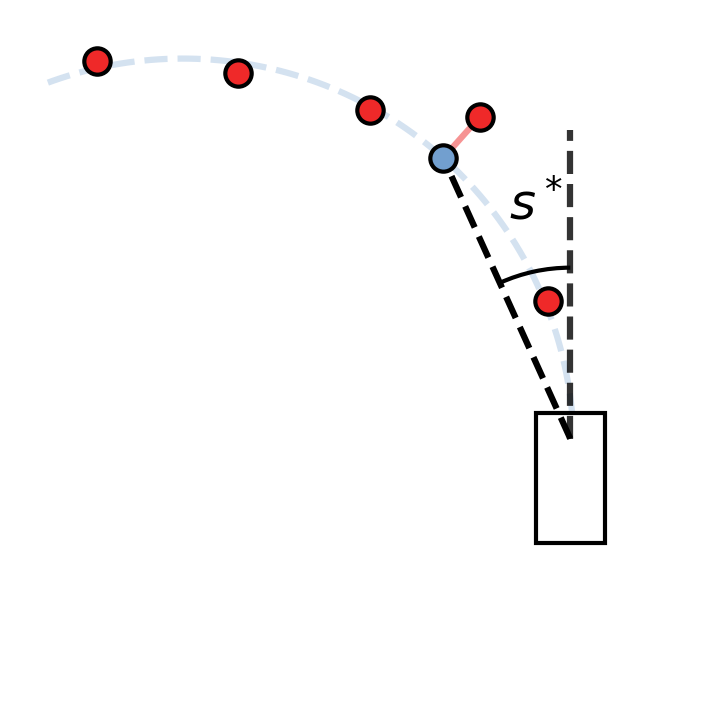

In [65]:
points = [[0.20066186907158112, -0.032855948849496976], [0.3703214095102396, -0.1323611333831328], [0.48125568589863593, -0.29269832005189755], [0.5339926472234708, -0.48612209986502347], [0.5527041638633724, -0.6915413640867977]]
points = [(0, 0)] + points
points = np.stack(points, 0)
points = points[:,::-1]
target_index = 2

c, r = ls_circle(points)
arc = make_arc(c, r, start=(np.pi + 1.0 * np.pi), end=2 * np.pi + 0.62 * np.pi)

# Perturb after to emphasize projection.
points[target_index] += [0, 0.1]
target = points[target_index]
closest = project_point_to_circle(target, c, r)

plt.figure(figsize=(2.5, 2.5), dpi=300)

ax = plt.gca()

x = Line2D([0, 0], [0, 0.5], color='k')
y = Line2D([0, 0.5], [0, 0], color='k')

project_to_arc = Line2D([target[0], closest[0]], [target[1], closest[1]], linestyle='-', color=colors['scarletred1'], alpha=0.5)
to_target = Line2D([0, closest[0]], [0, closest[1]], linestyle='--', color='k', zorder=6.0)
up = Line2D([0, 0], [0, np.linalg.norm(closest)], linestyle='--', color='k', zorder=6.0, alpha=0.8)
angle_arc = get_angle_plot(x, to_target, offset=0.5, color='k')

ax.plot(arc[:,0], arc[:,1], alpha=0.3, linestyle='--', color=colors['skyblue1'], zorder=0.0)


ax.add_line(to_target)
ax.add_line(project_to_arc)
ax.add_line(up)
ax.add_patch(angle_arc)


# Car
W = 0.1
H = W * 1.9
car = Rectangle(
        (0 - W / 2, 0.0 - H * 0.8), W, H,
        fill=True, edgecolor='k', facecolor='w', zorder=5.0)
ax.add_patch(car)


ax.text(-0.09, 0.32, r'$s^*$', fontsize=12)

#for i in range(1, len(points)):
#    ax.text(points[i,0] - 0.06, points[i,1], r'$p_%s$' % i, fontsize=8)
ax.scatter(closest[0], closest[1], color=colors['skyblue1'], zorder=8, s=40, edgecolor='k')
ax.scatter(points[1:,0], points[1:,1], color=colors['scarletred1'], zorder=8, s=40, edgecolor='k')

#plt.plot(points[0,0], points[0,1], 'k.')

BOUNDS = 0.7

ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
ax.set_facecolor((1.0, 1.0, 1.0))
plt.tight_layout()

plt.gca().axis('equal')
plt.xlim(-0.79, BOUNDS / 4)
plt.ylim(-0.02, 0.25)

plt.savefig('controller.pdf', dpi=300)
plt.show()

6.283185307179586 8.230972752405258


<Figure size 432x288 with 0 Axes>

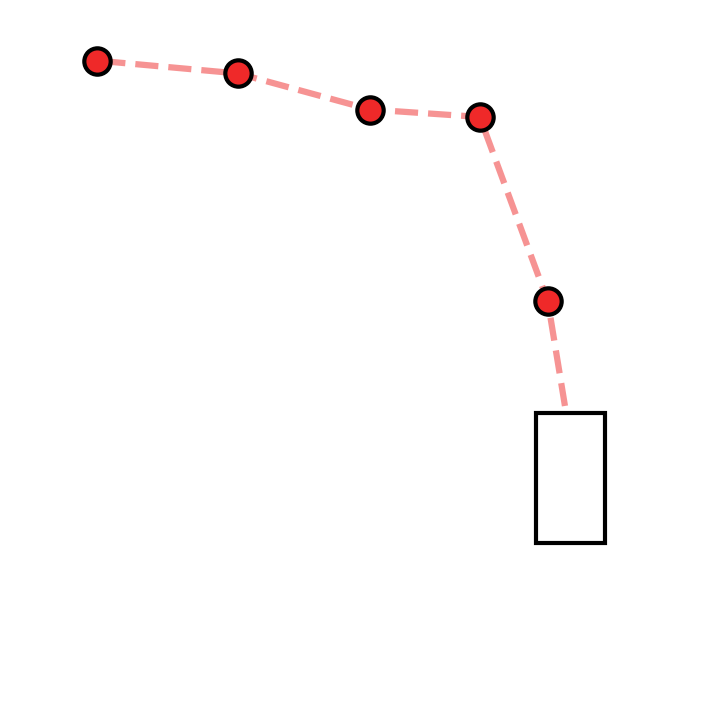

In [76]:
points = [[0.20066186907158112, -0.032855948849496976], [0.3703214095102396, -0.1323611333831328], [0.48125568589863593, -0.29269832005189755], [0.5339926472234708, -0.48612209986502347], [0.5527041638633724, -0.6915413640867977]]
points = [(0, 0)] + points
points = np.stack(points, 0)
points = points[:,::-1]
target_index = 2

c, r = ls_circle(points)
arc = make_arc(c, r, start=(np.pi + 1.0 * np.pi), end=2 * np.pi + 0.62 * np.pi)

# Perturb after to emphasize projection.
points[target_index] += [0, 0.1]
target = points[target_index]
closest = project_point_to_circle(target, c, r)

plt.clf()
plt.figure(figsize=(2.5, 2.5), dpi=300)

ax = plt.gca()

x = Line2D([0, 0], [0, 0.5], color='k')
y = Line2D([0, 0.5], [0, 0], color='k')

project_to_arc = Line2D([target[0], closest[0]], [target[1], closest[1]], linestyle='-', color=colors['scarletred1'], alpha=0.5)
to_target = Line2D([0, closest[0]], [0, closest[1]], linestyle='--', color='k', zorder=6.0)
up = Line2D([0, 0], [0, np.linalg.norm(closest)], linestyle='--', color='k', zorder=6.0, alpha=0.8)
angle_arc = get_angle_plot(x, to_target, offset=0.5, color='k')

# ax.plot(arc[:,0], arc[:,1], alpha=0.3, linestyle='--', color=colors['skyblue1'], zorder=0.0)


# ax.add_line(to_target)
# ax.add_line(project_to_arc)
# ax.add_line(up)
# ax.add_patch(angle_arc)


# Car
W = 0.1
H = W * 1.9
car = Rectangle(
        (0 - W / 2, 0.0 - H * 0.8), W, H,
        fill=True, edgecolor='k', facecolor='w', zorder=5.0)
ax.add_patch(car)


# ax.text(-0.09, 0.32, r'$s^*$', fontsize=12)

#for i in range(1, len(points)):
#    ax.text(points[i,0] - 0.06, points[i,1], r'$p_%s$' % i, fontsize=8)
# ax.scatter(closest[0], closest[1], color=colors['skyblue1'], zorder=8, s=40, edgecolor='k')
ax.scatter(points[1:,0], points[1:,1], color=colors['scarletred1'], zorder=8, s=40, edgecolor='k')
ax.plot(points[:,0], points[:,1], '--', color=colors['scarletred1'], alpha=0.5)

for i in range(len(points) - 1):
    x = (points[i,0] + points[i+1,0])/2
    y = (points[i,1] + points[i+1,1])/2
    #ax.text(x, y, r'$s_%s$' % (i+1))
    
#plt.plot(points[0,0], points[0,1], 'k.')

BOUNDS = 0.7

ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
ax.set_facecolor((1.0, 1.0, 1.0))
plt.tight_layout()

plt.gca().axis('equal')
plt.xlim(-0.79, BOUNDS / 4)
plt.ylim(-0.02, 0.25)

plt.savefig('speed.pdf', dpi=300)
plt.show()